In [1]:
using POMDPs
using POMDPToolbox
using POMDPModels
using Interact
value = Interact.value

value (generic function with 2 methods)

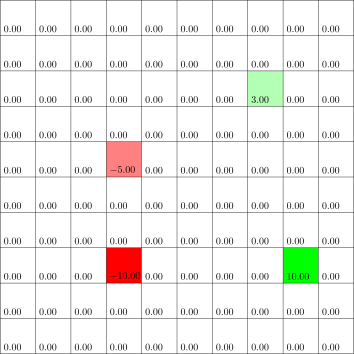

In [2]:
mdp = GridWorld()
plot(mdp, s->reward(mdp, s, :up))

# Value Iteration

The cell below runs policy iteration.

Interact.Options{:SelectionSlider,Int64}(1: "input" = 33 Int64 ,"i",33,"33",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(2=>"2",11=>"11",39=>"39",46=>"46",25=>"25",55=>"55",42=>"42",29=>"29",58=>"58",59=>"59"…)),Any[],Any[],true,"horizontal")

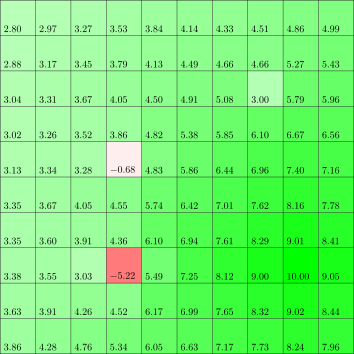

In [3]:
plots = []
tol = 1e-5
U = zeros(n_states(mdp))

while true
    Unew = Array{Float64}(n_states(mdp))
    
    for s in iterator(states(mdp))
        Qs = []
        for a in iterator(actions(mdp))
            
            # Calculate expectation of U(s')
            exp_Usp = 0.0
            tdist = transition(mdp, s, a)
            for sp in iterator(tdist)
                p = pdf(tdist, sp)
                if p > 0.0
                    exp_Usp += p*U[state_index(mdp, sp)]
                end
            end

            # Bellman
            push!(Qs, reward(mdp, s, a) + discount(mdp)*exp_Usp)
        end
        
        Unew[state_index(mdp, s)] = maximum(Qs)
    end
    
    push!(plots, plot(mdp, U))
    
    if maximum(abs(U-Unew)) < tol
        break
    end
    
    U = Unew
end

@manipulate for i in 1:length(plots)
    plots[i]
end

Now we can extract the policy.

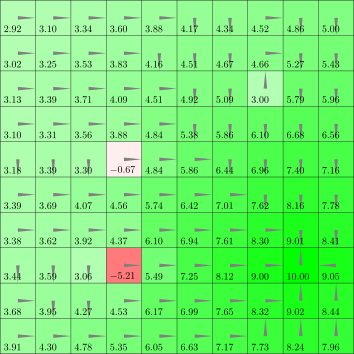

In [4]:
pi = Array{Symbol}(n_states(mdp))
for s in iterator(states(mdp))
    best = -Inf
    best_a = nothing

    for a in iterator(actions(mdp))
        # Calculate expectation of U(s')
        exp_Usp = 0.0
        tdist = transition(mdp, s, a)
        for sp in iterator(tdist)
            p = pdf(tdist, sp)
            if p > 0.0
                exp_Usp += p*U[state_index(mdp, sp)]
            end
        end

        # find the value of taking the action
        Q = reward(mdp, s, a) + discount(mdp)*exp_Usp
        if Q > best
            best = Q
            best_a = a
        end
    end
    pi[state_index(mdp, s)] = best_a
end

plot(mdp, U, VectorPolicy(mdp, pi))